## Fitting Data with an Exponential Function

Up to now, you've only needed to fit linear functions to your second year lab data. But in your physics future you'll probably want to fit all kinds of nasty functions to stuff. This post will provide an example of fitting an exponential function (which will be very applicable to your RC circuit data.)

Let's begin by loading some python libraries: NumPy for dealing with arrays and math, Matplotlib for plotting, and pandas to load some data in a nice format.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='serif')
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 10

I've scraped data from the [Transistor Count Wikipedia article](https://en.wikipedia.org/wiki/Transistor_count) using Google Sheets, which makes it very easy (see [this blog post](https://blog.ouseful.info/2008/10/14/data-scraping-wikipedia-with-google-spreadsheets/)).  The microprocessor chronology table lists the number of transistors found in processors released since the 1970s. I've cleaned the data and stored it in a .csv file.

Let's load it into a pandas DataFrame and look at the data.

In [46]:
df = pd.read_csv('./transistorDataClean.csv')

In [47]:
df

,Processor,Transistor count,Date of introduction,Designer
0,TMS 1000,8000,1974,Texas Instruments
1,Intel 4004,2300,1971,Intel
2,Intel 8008,3500,1972,Intel
3,MOS Technology 6502,3510,1975,MOS Technology
4,Motorola 6800,4100,1974,Motorola
...,...,...,...,...
98,Xbox One main SoC,5000000000,2013,Microsoft/AMD
99,18-core Xeon Haswell-E5,5560000000,2014,Intel
100,IBM z13 Storage Controller,7100000000,2015,IBM
101,22-core Xeon Broadwell-E5,7200000000,2016,Intel


 Plotting the transistor count as a function of year shows an exponential trend: [Moore's Law!](https://en.wikipedia.org/wiki/Moore's_law)

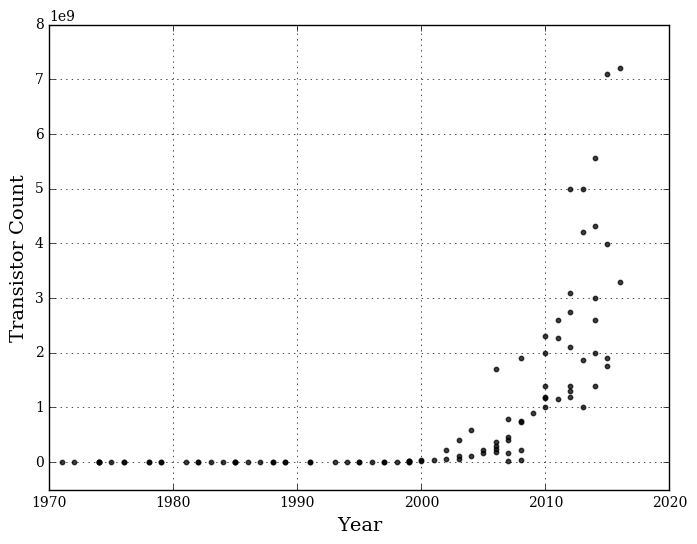

In [53]:
plt.scatter(df['Date of introduction'],df['Transistor count'],color='black',s=10,alpha=0.75)
plt.xlim(1970,2020)
plt.ylim(-0.5e9,0.8e10)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Transistor Count',fontsize=14)
plt.gcf().set_size_inches(8,6)
plt.grid()

Let's fit an exponential function to the data. We'll define a function nTransistors to calculate the number of transistors found in a typical processor in a given year:
$$
\begin{equation*}
n_{transistors} = n_0 \times e^{\frac{t}{\tau}}
\end{equation*}
$$

Here, $n_0$ is a normalization factor and $\tau$ represents the characteristic timescale of the exponential increase. We want to find the optimal values of $n_0$ and $\tau$ to represent our data. To keep the problem simple, we'll replace 'year' with 'number of years since 1970' by subtracting 1970 from all of the years. First, let's define the python function nTransistors(year,n0,tau):

In [84]:
def nTransistors(year,n0,tau):
    return(n0*np.exp((year-1970)/tau))

We'll use the curve_fit function from scipy.optimize to perform the parameter optimization. [See the documentation here.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [85]:
from scipy.optimize import curve_fit

We'll pass the curve_fit function the name of the function we want to find parameter values for (nTransistors) and the x and y values of the data we have. It will return 2 things: a list of the best values of $n_0$,$t_0$, and $\tau$ (which we'll call pOpt), and an array containing the covariance of the best fit parameters (which we'll call pCov, but we won't worry about for now.) 

In [88]:
pOpt,pCov = curve_fit(nTransistors,df['Date of introduction'],df['Transistor count'])

Let's take a look at the best fit values we found.

In [91]:
print(pOpt)

[  1.14085588e+05   4.25038087e+00]


This means our best fit value for $n_0=1.141\times 10^5$ and our best fit value of $\tau=4.250$. Let's plot the best fit exponential along with the data by evaluating the function nTransistors at various years with $n_0$ and $\tau$ set to our best fit values. 

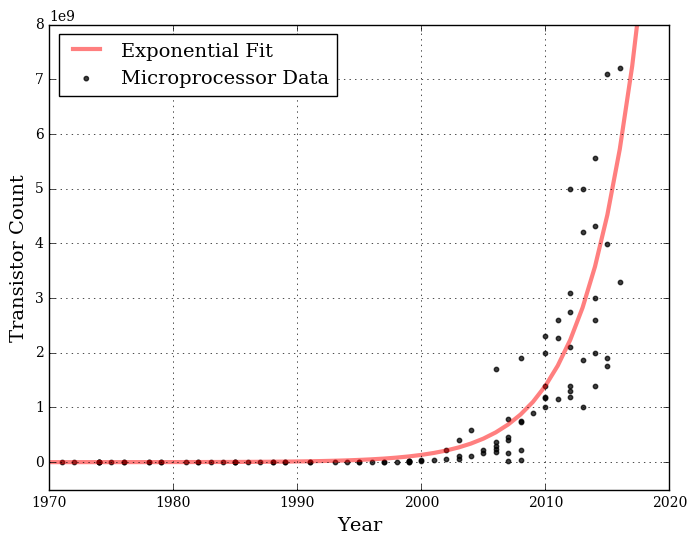

In [96]:
tPlot = np.arange(1970,2020,1)
nPlot = nTransistors(tPlot,pOpt[0],pOpt[1])

plt.scatter(df['Date of introduction'],df['Transistor count'],color='black',s=10,\
            alpha=0.75,label='Microprocessor Data')
plt.plot(tPlot,nPlot,color='red',alpha=0.5,lw=3,label='Exponential Fit')
plt.xlim(1970,2020)
plt.ylim(-0.5e9,0.8e10)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Transistor Count',fontsize=14)
plt.gcf().set_size_inches(8,6)
plt.grid()
plt.legend(loc='upper left',scatterpoints=1,fontsize=14)

Not too shabby!